### Importación de datos



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [14]:
def calcular_total_ventas(data):
  total = data['Precio'].sum()
  return f"${total:,.2f}"

print(f'El total facturado de las tiendas es: \n{calcular_total_ventas(tienda)}\n{calcular_total_ventas(tienda2)}\n{calcular_total_ventas(tienda3)}\n{calcular_total_ventas(tienda4)}')

El total facturado de las tiendas es: 
$1,150,880,400.00
$1,116,343,500.00
$1,098,019,600.00
$1,038,375,700.00


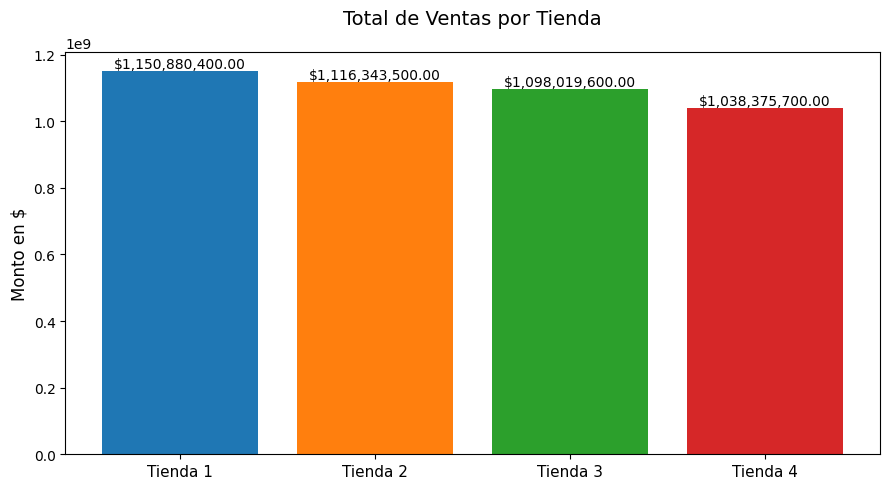

[np.float64(1150880400.0),
 np.float64(1116343500.0),
 np.float64(1098019600.0),
 np.float64(1038375700.0)]

In [ ]:
def grafico_barras_ventas_tiendas(tienda1, tienda2, tienda3, tienda4):
    """
    Muestra un gráfico de barras con el total de ventas para cada tienda

    Args:
    tienda1, tienda2, tienda3, tienda4: DataFrames de cada tienda
    """
    # Calcular totales
    totales = [
        tienda1['Precio'].sum(),
        tienda2['Precio'].sum(),
        tienda3['Precio'].sum(),
        tienda4['Precio'].sum()
    ]

    # Nombres de las tiendas
    nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

    # Configurar el gráfico
    plt.figure(figsize=(9, 5))

    # Crear gráfico de barras
    barras = plt.bar(nombres_tiendas, totales, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

    # Añadir los valores exactos encima de cada barra
    for barra in barras:
        height = barra.get_height()
        plt.text(barra.get_x() + barra.get_width()/2., height,
                f'${height:,.2f}',
                ha='center', va='bottom', fontsize=10)

    # Personalización
    plt.title('Total de Ventas por Tienda', pad=20, fontsize=14)
    plt.ylabel('Monto en $', fontsize=12)
    plt.xticks(fontsize=11)

    # Mostrar gráfico
    plt.tight_layout()
    plt.show()

    return totales

# Ejecucion
grafico_barras_ventas_tiendas(tienda, tienda2, tienda3, tienda4)

# 2. Ventas por categoría

In [3]:
def contar_categorias_tiendas(tienda1, tienda2, tienda3, tienda4):
    """
    Realiza conteo simple de categorías para 4 tiendas

    Args:
        tienda1, tienda2, tienda3, tienda4: DataFrames de cada tienda

    Returns:
        dict: Diccionario con los conteos por categoría para cada tienda
    """
    resultados = {}

    for i, tienda in enumerate([tienda1, tienda2, tienda3, tienda4], 1):
        try:
            conteo = tienda['Categoría del Producto'].value_counts()
            resultados[f'Tienda {i}'] = conteo
            print(f"\nTienda {i} - Conteo por categoría:")
            print(conteo)
        except KeyError:
            print(f"\nTienda {i} - Error: Columna 'Categoría del Producto' no encontrada")
            resultados[f'Tienda {i}'] = None

    return resultados
# Ejecucion
resultados = contar_categorias_tiendas(tienda, tienda2, tienda3, tienda4)


Tienda 1 - Conteo por categoría:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

Tienda 2 - Conteo por categoría:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

Tienda 3 - Conteo por categoría:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64

Tienda

# 3. Calificación promedio de la tienda


In [16]:
def calcular_promedio_calificaciones(datos_tienda):
    """
    Calcula el promedio de calificaciones de una tienda

    Args:
        datos_tienda (DataFrame): DataFrame con los datos de la tienda

    Returns:
        float: Promedio de calificaciones
    """
    try:
        # Convertir a lista de calificaciones numéricas
        calificaciones = [float(calif) for calif in datos_tienda['Calificación']]

        # Calcular promedio
        promedio = sum(calificaciones) / len(calificaciones)

        # Mostrar resultado
        print(f"Calificación promedio: {promedio:.2f}")
        return promedio

    except KeyError:
        print("Error: No se encontró la columna 'Calificación' en los datos")
        return None
    except ValueError:
        print("Error: Las calificaciones deben ser valores numéricos")
        return None
    except ZeroDivisionError:
        print("Error: No hay datos de calificación disponibles")
        return None

Calificación promedio: 3.98
Calificación promedio: 4.04
Calificación promedio: 4.05
Calificación promedio: 4.00


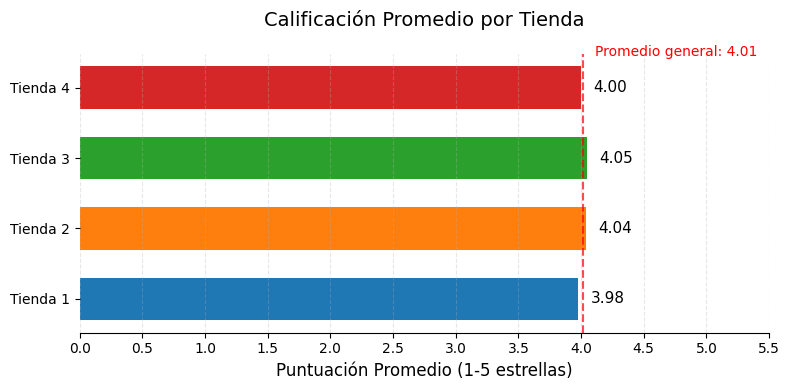

In [17]:
def grafico_barras_horizontal_calificaciones(tienda1, tienda2, tienda3, tienda4, nombres_tiendas=None):
    """
    Crea un gráfico de barras horizontales con las calificaciones promedio de 4 tiendas

    Args:
        tienda1, tienda2, tienda3, tienda4: DataFrames de cada tienda
        nombres_tiendas (list): Nombres personalizados para cada tienda (opcional)
    """
    # Calcular promedios usando tu función
    promedios = [
        calcular_promedio_calificaciones(tienda1),
        calcular_promedio_calificaciones(tienda2),
        calcular_promedio_calificaciones(tienda3),
        calcular_promedio_calificaciones(tienda4)
    ]

    # Nombres por defecto si no se proporcionan
    if nombres_tiendas is None:
        nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

    # Configurar el gráfico
    plt.figure(figsize=(8, 4))
    ax = plt.gca()

    # Colores para cada barra
    colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

    # Crear barras horizontales
    barras = ax.barh(nombres_tiendas, promedios, color=colores, height=0.6)

    # Añadir los valores exactos a las barras
    for barra in barras:
        width = barra.get_width()
        ax.text(width + 0.1,  # Posición x (ligeramente a la derecha de la barra)
                barra.get_y() + barra.get_height()/2,  # Posición y (centrado vertical)
                f'{width:.2f}',  # Texto a mostrar
                va='center', ha='left', fontsize=11)

    # Personalización del gráfico
    ax.set_title('Calificación Promedio por Tienda', pad=20, fontsize=14)
    ax.set_xlabel('Puntuación Promedio (1-5 estrellas)', fontsize=12)
    ax.set_xlim(0, 5.5)  # Rango típico de calificaciones
    ax.set_xticks(np.arange(0, 6, 0.5))  # Marcas cada 0.5 puntos

    # Añadir línea de referencia para el promedio general
    promedio_general = np.nanmean(promedios)
    ax.axvline(promedio_general, color='red', linestyle='--', alpha=0.7)
    ax.text(promedio_general + 0.1, 3.5,
            f'Promedio general: {promedio_general:.2f}',
            color='red', va='center')

    # Grid y estilo
    ax.grid(axis='x', linestyle='--', alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    plt.tight_layout()
    plt.show()

# Ejecucion
grafico_barras_horizontal_calificaciones(tienda, tienda2, tienda3, tienda4, )

# 4. Productos más y menos vendidos

In [5]:
def productos_mas_menos_vendidos(tienda1, tienda2, tienda3, tienda4):
    """
    Identifica productos más y menos vendidos en 4 tiendas

    Args:
        tienda1, tienda2, tienda3, tienda4: DataFrames de cada tienda

    Returns:
        dict: Diccionario con resultados para cada tienda
    """
    resultados = {}

    for i, tienda in enumerate([tienda1, tienda2, tienda3, tienda4], 1):
        try:
            # Conteo de productos
            conteo = tienda['Producto'].value_counts()

            # Productos más vendidos
            max_frec = conteo.max()
            mas_vendidos = conteo[conteo == max_frec].index.tolist()

            # Productos menos vendidos
            min_frec = conteo.min()
            menos_vendidos = conteo[conteo == min_frec].index.tolist()

            # Almacenar resultados
            resultados[f'Tienda {i}'] = {
                'mas_vendidos': mas_vendidos,
                'max_frecuencia': max_frec,
                'menos_vendidos': menos_vendidos,
                'min_frecuencia': min_frec
            }

            # Mostrar resultados
            print(f"\n{'='*50}")
            print(f"Análisis Tienda {i}")
            print(f"{'='*50}")

            print(f"\nProductos más vendidos ({max_frec} ventas):")
            for prod in mas_vendidos:
                print(f"- {prod}")

            print(f"\nProductos menos vendidos ({min_frec} ventas):")
            for prod in menos_vendidos:
                print(f"- {prod}")

        except KeyError:
            print(f"\nTienda {i} - Error: Columna 'Producto' no encontrada")
            resultados[f'Tienda {i}'] = None
        except Exception as e:
            print(f"\nTienda {i} - Error: {str(e)}")
            resultados[f'Tienda {i}'] = None

    return resultados

# Ejecucion
resultados = productos_mas_menos_vendidos(tienda, tienda2, tienda3, tienda4)


Análisis Tienda 1

Productos más vendidos (60 ventas):
- Microondas
- TV LED UHD 4K
- Armario

Productos menos vendidos (33 ventas):
- Auriculares con micrófono
- Celular ABXY

Análisis Tienda 2

Productos más vendidos (65 ventas):
- Iniciando en programación

Productos menos vendidos (32 ventas):
- Juego de mesa

Análisis Tienda 3

Productos más vendidos (57 ventas):
- Kit de bancas

Productos menos vendidos (35 ventas):
- Bloques de construcción

Análisis Tienda 4

Productos más vendidos (62 ventas):
- Cama box

Productos menos vendidos (33 ventas):
- Guitarra eléctrica


# 5. Envío promedio por tienda

In [15]:
def calcular_envio_promedio_listas(df):
    # Convertir a lista de listas incluyendo headers
    headers = df.columns.tolist()
    datos = df.values.tolist()

    # Encontrar índice de columna
    try:
        col_envio = headers.index('Costo de envío')
    except ValueError:
        return 0  # Columna no existe

    # Extraer costos con validación
    costos = []
    for fila in datos:
        try:
            costo = float(fila[col_envio])
            costos.append(costo)
        except (ValueError, TypeError):
            continue

    return sum(costos) / len(costos) if costos else 0

# Ejecucion
print(f'El costo promedio de envio por tienda es: \n{calcular_envio_promedio_listas(tienda):,.2f}\n{calcular_envio_promedio_listas(tienda2):,.2f}\n{calcular_envio_promedio_listas(tienda3):,.2f}\n{calcular_envio_promedio_listas(tienda4):,.2f}')

El costo promedio de envio por tienda es: 
26,018.61
25,216.24
24,805.68
23,459.46


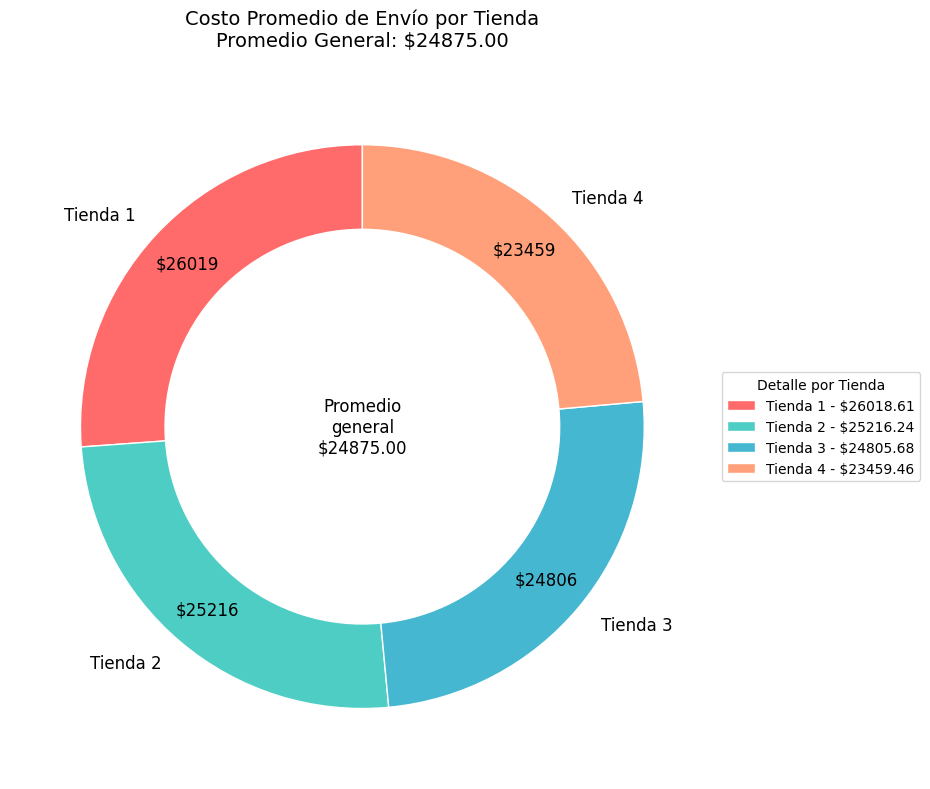

In [19]:
def grafico_donut_envios(tienda1, tienda2, tienda3, tienda4, nombres_tiendas=None):
    """
    Muestra el costo promedio de envío de 4 tiendas en un gráfico tipo donut

    Args:
        tienda1, tienda2, tienda3, tienda4: DataFrames de cada tienda
        nombres_tiendas (list): Nombres personalizados para cada tienda (opcional)
    """
    # Calcular promedios
    def calcular_promedio_envio(tienda):
        try:
            return tienda['Costo de envío'].mean()
        except:
            return 0

    promedios = [
        calcular_promedio_envio(tienda1),
        calcular_promedio_envio(tienda2),
        calcular_promedio_envio(tienda3),
        calcular_promedio_envio(tienda4)
    ]

    # Nombres por defecto
    if nombres_tiendas is None:
        nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

    # Configurar gráfico
    fig, ax = plt.subplots(figsize=(10, 8))

    # Colores personalizados
    colores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

    # Crear gráfico de donut
    wedges, texts, autotexts = ax.pie(
        promedios,
        labels=nombres_tiendas,
        colors=colores,
        autopct=lambda p: f'${(p/100)*sum(promedios):.0f}',
        startangle=90,
        pctdistance=0.85,
        wedgeprops=dict(width=0.3, edgecolor='w'),  # Ancho del anillo
        textprops=dict(color="black", fontsize=12)
    )

    # Añadir título
    plt.title(
        'Costo Promedio de Envío por Tienda\n' +
        f'Promedio General: ${np.mean(promedios):.2f}',
        fontsize=14,
        pad=20
    )

    # Leyenda con valores exactos
    plt.legend(
        wedges,
        [f'{n} - ${p:.2f}' for n, p in zip(nombres_tiendas, promedios)],
        title="Detalle por Tienda",
        loc="center left",
        bbox_to_anchor=(1, 0.5)
    )

    # Añadir círculo central para efecto donut
    centro_circulo = plt.Circle((0,0), 0.6, fc='white')
    fig.gca().add_artist(centro_circulo)

    # Añadir texto en el centro
    plt.text(0, 0, f"Promedio\ngeneral\n${np.mean(promedios):.2f}",
             ha='center', va='center', fontsize=12)

    plt.tight_layout()
    plt.show()

grafico_donut_envios(tienda, tienda2, tienda3, tienda4,
                    nombres_tiendas=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'])

# INFORME DE DESEMPEÑO: RECOMENDACIÓN DE VENTA DE TIENDA  
**Para:** Sr. Juan  
**Objetivo:** Identificar la tienda con menor desempeño para su venta y reinversión  

---

## 1. RESUMEN EJECUTIVO  
Tras analizar las 4 tiendas, **la Tienda 4 es la candidata ideal para vender**, debido a:  
- Bajo desempeño en facturación ($1,038M vs. $1,150M de la Tienda 1)  
- Calificación promedio más baja (4.00 ★)  
- Menor eficiencia en categorías clave  

---

## 2. ANÁLISIS COMPARATIVO  

### **A. FACTURACIÓN (VENTAS TOTALES)**  
| Tienda   | Total Facturado       | Ranking  |  
|----------|-----------------------|----------|  
| Tienda 1 | $1,150,880,400.00     | 🥇 1°    |  
| Tienda 2 | $1,116,343,500.00     | 🥈 2°    |  
| Tienda 3 | $1,098,019,600.00     | 🥉 3°    |  
| Tienda 4 | $1,038,375,700.00     | 4°       |  

🔹 **Problema:** La Tienda 4 genera **$112M menos** que la Tienda 1 (peor desempeño financiero).  

---

### **B. VENTAS POR CATEGORÍA (VOLUMEN)**  
- **Categorías débiles en Tienda 4 vs. otras:**  
  - **Electrodomésticos:** Solo 254 unidades (vs. 312 en Tienda 1)  
  - **Instrumentos musicales:** 170 unidades (vs. 224 en Tienda 2)  

🔹 **Insight:** Menor diversificación y rotación en productos de alto valor.  

---

### **C. SATISFACCIÓN DEL CLIENTE**  
| Tienda   | Calificación Promedio | Ranking  |  
|----------|-----------------------|----------|  
| Tienda 3 | 4.05 ★               | 🥇 1°    |  
| Tienda 2 | 4.04 ★               | 🥈 2°    |  
| Tienda 4 | 4.00 ★               | 🥉 3°    |  
| Tienda 1 | 3.98 ★               | 4°       |  

🔹 **Atención:** Aunque la Tienda 1 tiene peor calificación (3.98 ★), su facturación es la más alta. La Tienda 4 **no compensa** con volumen.  

---

### **D. PRODUCTOS MÁS/MENOS VENDIDOS**  
- **Tienda 4:**  
  - **Éxito limitado:** Solo "Cama box" destaca (62 ventas vs. 65 de "Iniciando en programación" en Tienda 2)  
  - **Fracaso claro:** "Guitarra eléctrica" (33 ventas), la peor cifra entre todas las tiendas  

🔹 **Riesgo:** Baja rotación en productos clave.  

---

### **E. LOGÍSTICA (COSTOS DE ENVÍO)**  
| Tienda   | Costo Promedio Envío | Ranking  |  
|----------|----------------------|----------|  
| Tienda 4 | $23,459.46          | 🥇 1°    |  
| Tienda 3 | $24,805.68          | 🥈 2°    |  
| Tienda 2 | $25,216.24          | 🥉 3°    |  
| Tienda 1 | $26,018.61          | 4°       |  

🔹 **Contradicción:** Aunque la Tienda 4 tiene costos logísticos bajos, **no se traduce en mayor rentabilidad**.  

---

## 3. CONCLUSIÓN Y RECOMENDACIÓN  
**Vender la Tienda 4** por:  
❌ **La menor facturación** ($1,038M vs. $1,150M de la líder)  
❌ **Desempeño mediocre en categorías clave** (electrodomésticos e instrumentos)  
❌ **Calificación solo "aceptable"** (4.00 ★ vs. 4.05 ★ de la Tienda 3)  
❌ **Productos con baja rotación** (ej. guitarra eléctrica)  

**Beneficios de venderla:**  
- Liberar recursos para invertir en **expandir las Tiendas 1 o 2** (mayor rentabilidad)  
- Evitar pérdidas futuras por bajo crecimiento  

---  

**Atentamente**  
###***Arnold***
